In [19]:
import numpy as np
import pandas as pd

In [20]:
df=pd.read_csv('/Users/kristalshrestha/Code/MachineLearning100Days/End_to_End_toy_project/placement.csv')


In [21]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [22]:
df.shape

(100, 4)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [24]:
df=df.iloc[:,1:]

In [25]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [26]:
import matplotlib.pyplot as plt

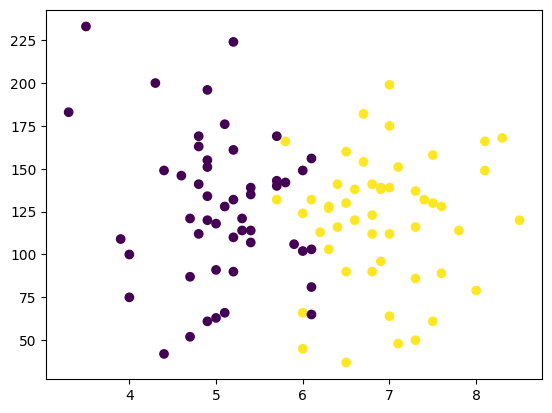

In [28]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

x carrying independent variables


In [29]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [30]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [33]:
x.shape

(100, 2)

In [31]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [32]:
y.shape

(100,)

In [34]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [38]:
x_train

,cgpa,iq
46,5.3,114.0
52,7.0,175.0
54,6.4,141.0
51,4.8,141.0
15,5.1,176.0
...,...,...
5,7.1,48.0
49,5.4,135.0
1,5.9,106.0
8,6.1,156.0


In [39]:
y_train

46    0
52    1
54    1
51    0
15    0
     ..
5     1
49    0
1     0
8     0
77    1
Name: placement, Length: 90, dtype: int64

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler=StandardScaler()

In [42]:
x_train=scaler.fit_transform(x_train)

In [43]:
x_train

array([[-0.60391898, -0.22718341],
       [ 0.90096056,  1.26116614],
       [ 0.3698266 ,  0.43159426],
       [-1.0465306 ,  0.43159426],
       [-0.78096363,  1.28556531],
       [ 0.0157373 , -1.91072634],
       [ 0.90096056, -0.27598176],
       [ 0.81243823,  0.35839674],
       [-0.78096363, -1.39834371],
       [-1.4006199 , -1.98392386],
       [-1.0465306 ,  0.96837606],
       [ 1.43209451,  0.11440501],
       [ 2.22879544, -0.08078837],
       [-1.75470921, -0.56877183],
       [ 0.72391591, -0.27598176],
       [ 0.72391591,  0.43159426],
       [ 1.43209451, -0.83716273],
       [ 0.19278195, -0.25158258],
       [ 0.10425963,  0.2120017 ],
       [-0.6924413 ,  2.45672562],
       [ 1.25504986,  0.2120017 ],
       [-0.86948595, -0.12958672],
       [-0.24982967,  0.40719509],
       [-1.13505293, -1.73993213],
       [-1.13505293, -0.88596108],
       [ 0.63539358,  1.43196035],
       [ 1.60913916, -0.22718341],
       [ 0.28130428,  0.11440501],
       [-1.0465306 ,

In [44]:
x_test=scaler.transform(x_test)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
clf=LogisticRegression()

In [48]:
#this is model training
clf.fit(x_train,y_train)

LogisticRegression()

In [51]:
y_pred=clf.predict(x_test)

In [50]:
y_test

89    0
44    1
59    0
92    0
83    1
24    0
48    1
33    0
37    1
12    0
Name: placement, dtype: int64

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(y_test,y_pred)

0.9

In [55]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

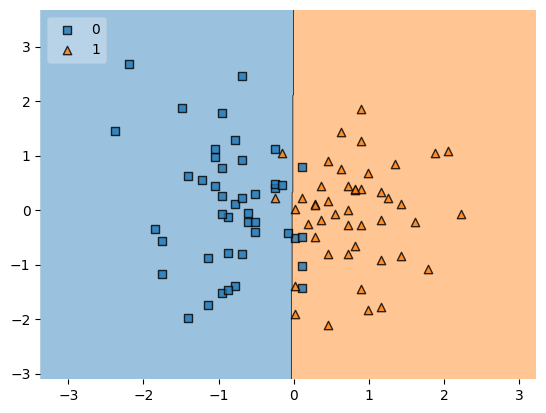

In [56]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [57]:
import pickle

In [58]:
pickle.dump(clf,open('model.pkl','wb'))

In [ ]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [ ]:

# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model